In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

In [6]:
data = pd.read_csv('../data/BTC-USD.csv')

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-21,28311.310547,30737.330078,28283.410156,30027.296875,30027.296875,33346760979
1,2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,29912.281250,20653160491
2,2023-06-23,29896.382813,31389.539063,29845.214844,30695.468750,30695.468750,24115570085
3,2023-06-24,30708.738281,30804.148438,30290.146484,30548.695313,30548.695313,12147822496
4,2023-06-25,30545.150391,31041.271484,30327.943359,30480.261719,30480.261719,12703464114


## Columns Description

Open - The price at which the financial security opens in the market when trading begins.

High- The highest price at which a stock traded during a period.

Low- The minimum price of a stock in a period.

Close- The last price at which a stock trades during a regular trading session.

Adj close- The closing price after dividend payouts, stock splits, or the issue of additional shares (adjustments) have been taken into account.

Volume- The number of shares traded in a stock or contracts traded in futures or options.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       367 non-null    float64
 2   High       367 non-null    float64
 3   Low        367 non-null    float64
 4   Close      367 non-null    float64
 5   Adj Close  367 non-null    float64
 6   Volume     367 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.2+ KB


In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,367.000000,367.000000,367.000000,367.000000,367.000000,3.670000e+02
mean,44926.503337,45771.352606,44116.403664,45023.096379,45023.096379,2.355539e+10
std,16009.456910,16420.032577,15515.377004,16016.481587,16016.481587,1.413693e+10
min,25160.658203,25858.375000,24930.296875,25162.654297,25162.654297,5.331173e+09
25%,29833.579101,30189.856446,29578.351562,29882.653321,29882.653321,1.332629e+10
50%,42091.753906,42876.347656,41446.824219,42120.054688,42120.054688,2.050664e+10
75%,63421.406250,64552.923828,61596.734375,63469.482422,63469.482422,2.943905e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,1.028029e+11


### Data distribution of volume

Text(0.5, 1.0, 'Volume of stock versus time')

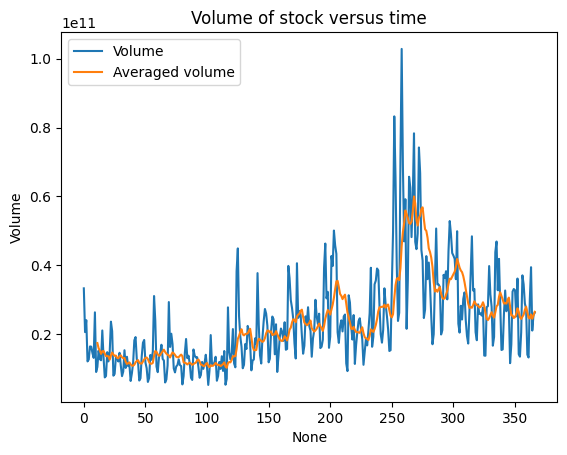

In [11]:
# Plotting data distribution of the volume

sns.lineplot(x=data.index,y=data['Volume'],label='Volume')
sns.lineplot(x=data.index,y=data['Volume'].rolling(window=12).mean(),label='Averaged volume')
plt.title('Volume of stock versus time')

In [15]:
data['Date'] = pd.to_datetime(data['Date'])

## Candlestick chart

In [16]:
import mplfinance as mpf

In [19]:
data.set_index('Date', inplace=True)

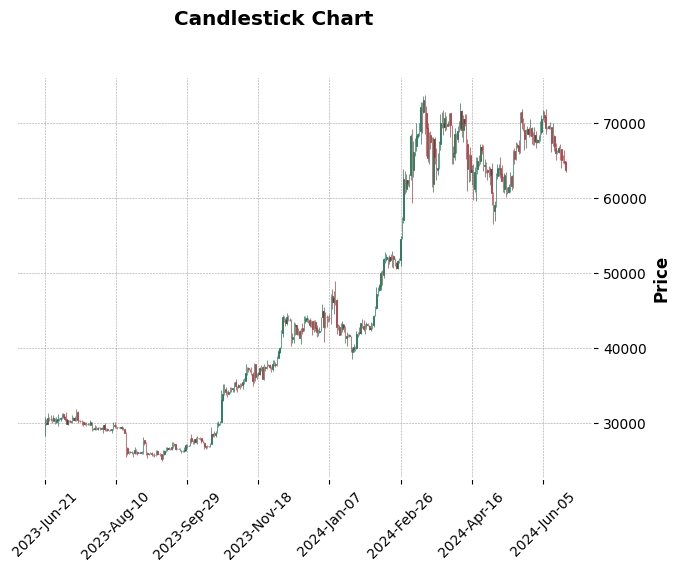

In [20]:
mpf.plot(data, type='candle', style='charles', title='Candlestick Chart', ylabel='Price')

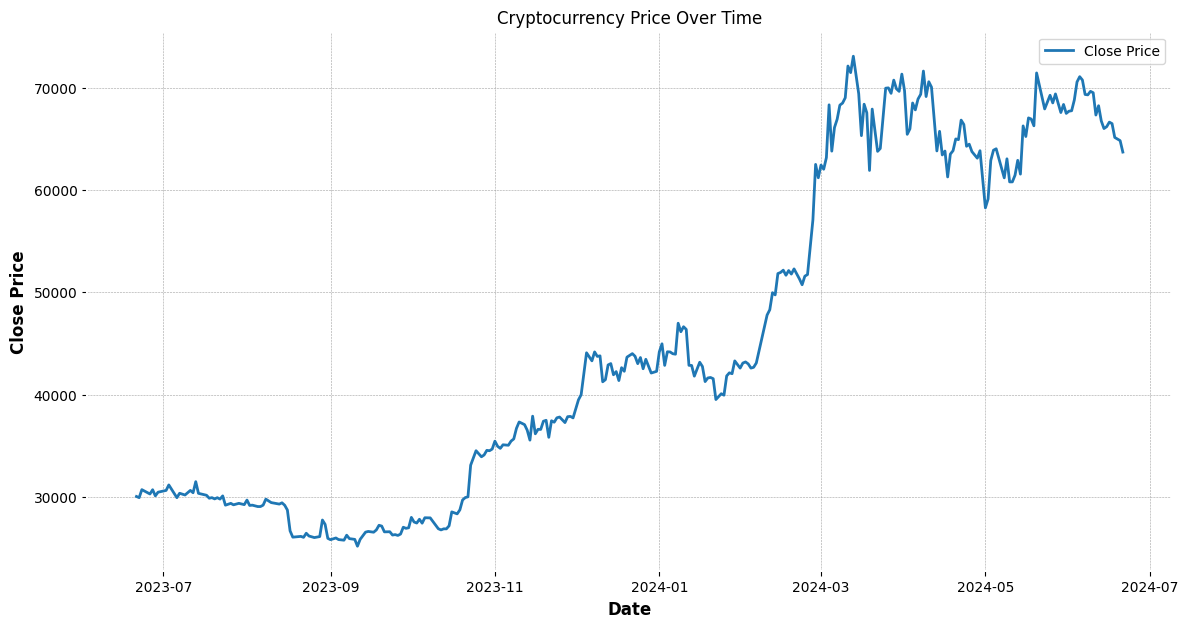

In [21]:
plt.figure(figsize=(14, 7))
plt.title("Cryptocurrency Price Over Time")
plt.plot(data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

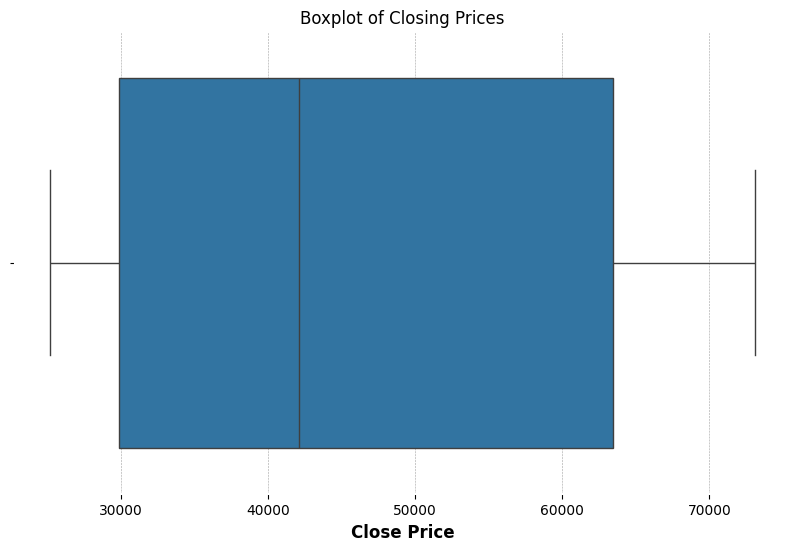

In [22]:
# Boxplot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Close'])
plt.title('Boxplot of Closing Prices')
plt.xlabel('Close Price')
plt.show()

## Moving Averages

In [24]:
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

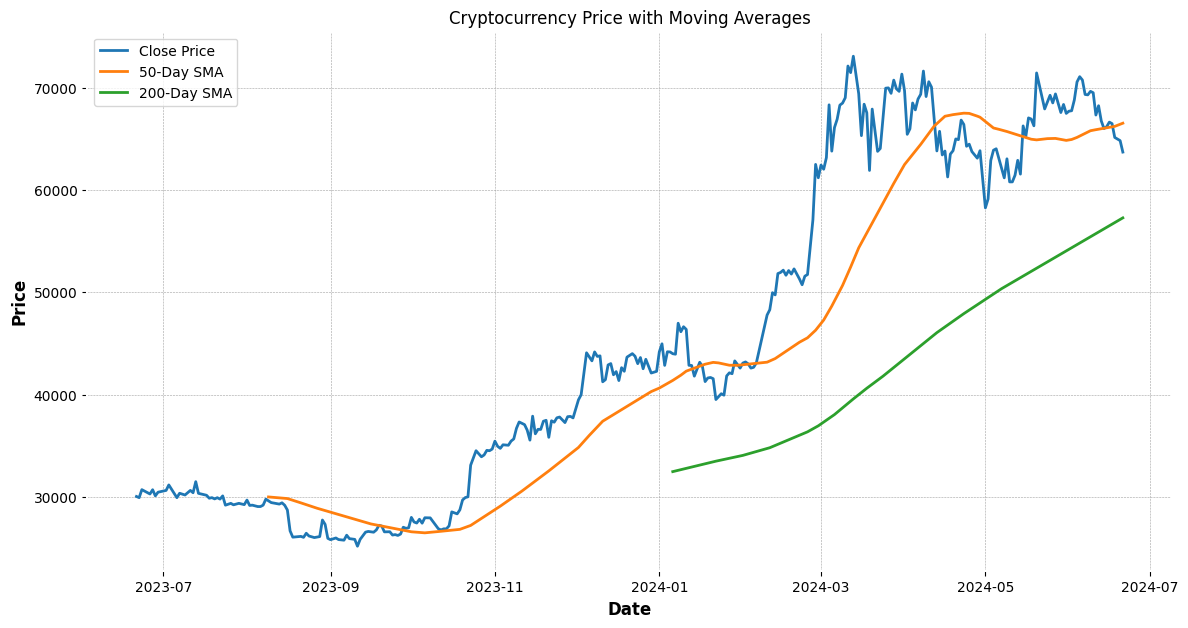

In [25]:
plt.figure(figsize=(14, 7))
plt.title("Cryptocurrency Price with Moving Averages")
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='50-Day SMA')
plt.plot(data['SMA_200'], label='200-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 50-Day SMA
Average closing price over the previous 50 days
It gives a realistic and effective trend indicator
### 200-Day SMA
Average closing price over the previous 200 days
It is considered a key indicator by traders and market analysts for determining overall long-term market trends.

### Trends
The prices showed a slight decline around August-September 2023, then had a significant upward trend starting from around November 2023, indicating a strong bullish phase.

### Crossovers

